In [1]:
import numpy as np
import matplotlib.pyplot as plt  # for 畫圖用
import pandas as pd
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from openpyxl import load_workbook
from openpyxl import Workbook

Using TensorFlow backend.


In [2]:
# Import the training set
dataset_train = pd.read_excel('B(半導體).xlsx')  # 讀取訓練集
dataset_test = pd.read_excel('B(半導體)_測試.xlsx')
dataset_realtest = pd.read_excel('B(半導體)_50天_ques.xlsx')
data_all = pd.concat((dataset_train,dataset_test), axis = 0)
data_all=data_all.fillna(method="ffill",limit=10)
#dataset_train=dataset_train.dropna(axis=1)
training_set = data_all.iloc[:,[2,5,31,32,33,34,36,41,42,43,44,45,46]]#.values  # 取欄位值
training_set1= data_all.iloc[:, 1:2].values

In [3]:
#data_all

In [4]:
real_stock_price =data_all.iloc[2100:2232,1].values

In [5]:
train = data_all.iloc[:2100,[2,5,31,32,33,34,36,41,42,43,44,45,46]]

In [6]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
sc1 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled1 = sc1.fit_transform(training_set1)

In [7]:
X_train = []   
y_train = []   
for i in range(7, 2100):  # 2100 是訓練集總數
    X_train.append(training_set_scaled[i-7:i,:])
    y_train.append(training_set_scaled1[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)  # 轉成numpy array的格式，以利輸入 RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]*X_train.shape[2], 1))
# Import the Keras libraries and packages

# Initialising the RNN
regressor = Sequential()

In [8]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
# Adding the output layer
regressor.add(Dense(units = 1))
# Compiling
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# 進行訓練
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
2093/2093 [==============================] - 13s 6ms/step - loss: 0.0148
Epoch 2/100
2093/2093 [==============================] - 12s 6ms/step - loss: 0.0089
Epoch 3/100
2093/2093 [==============================] - 12s 6ms/step - loss: 0.0093
Epoch 4/100
2093/2093 [==============================] - 13s 6ms/step - loss: 0.0080
Epoch 5/100
2093/2093 [==============================] - 12s 6ms/step - loss: 0.0066
Epoch 6/100
2093/2093 [==============================] - 11s 5ms/step - loss: 0.0025
Epoch 7/100
2093/2093 [==============================] - 11s 5ms/step - loss: 0.0017
Epoch 8/100
2093/2093 [==============================] - 10s 5ms/step - loss: 0.0017
Epoch 9/100
2093/2093 [==============================] - 10s 5ms/step - loss: 0.0014
Epoch 10/100
2093/2093 [==============================] - 10s 5ms/step - loss: 0.0013
Epoch 11/100
2093/2093 [==============================] - 11s 5ms/step - loss: 0.0011
Epoch 12/100
2093/2093 [==============================] - 11s 5

2093/2093 [==============================] - 8s 4ms/step - loss: 6.0880e-04
Epoch 94/100
2093/2093 [==============================] - 8s 4ms/step - loss: 5.9861e-04
Epoch 95/100
2093/2093 [==============================] - 9s 4ms/step - loss: 6.1116e-04
Epoch 96/100
2093/2093 [==============================] - 10s 5ms/step - loss: 6.3340e-04
Epoch 97/100
2093/2093 [==============================] - 9s 4ms/step - loss: 6.8276e-04
Epoch 98/100
2093/2093 [==============================] - 9s 4ms/step - loss: 6.2041e-04
Epoch 99/100
2093/2093 [==============================] - 9s 4ms/step - loss: 6.6599e-04
Epoch 100/100
2093/2093 [==============================] - 9s 4ms/step - loss: 6.6541e-04


In [9]:
#test = sc.fit_transform(training_set)

In [10]:
X_test=[]
for i in range(2101, 2232):  # 1747 是訓練集總數
    X_test.append(training_set_scaled[i-7:i,0:])

In [11]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]*X_test.shape[2], 1))

In [12]:
#list(X_test)

In [13]:
predicted_stock_price = regressor.predict(X_test)

In [14]:
predicted_stock_price = sc1.inverse_transform(predicted_stock_price)

Text(0, 0.5, 'B Price')

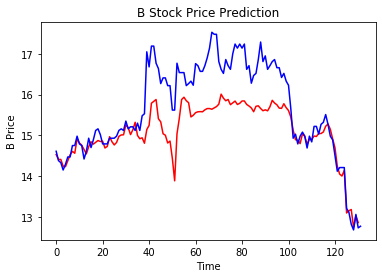

In [15]:
plt.plot(predicted_stock_price,color='red',label= 'predicted_stock_price')
plt.plot(real_stock_price,color = 'blue',label='real_stock_price')
plt.title('B Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('B Price')

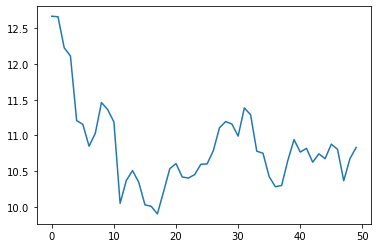

In [20]:
data_50 = pd.read_excel('B(半導體)_50天_ques.xlsx')
data_50 = data_50.iloc[:,[2,5,31,32,33,34,36,41,42,43,44,45,46]]
data_50plus = pd.concat((dataset_test,data_50),join='inner', axis = 0)
data_50plus=data_50plus.fillna(method="ffill")
final_scaled=sc.transform(data_50plus)
X_final = []
for i in range(485, 535):  # 1747 是訓練集總數
    X_final.append(final_scaled[i-7:i,0:])
X_final = np.array(X_final)
X_final = np.reshape(X_final, (X_final.shape[0], X_final.shape[1]*X_final.shape[2], 1))
predicted_stock_price = regressor.predict(X_final)
predicted_stock_price = sc1.inverse_transform(predicted_stock_price)
plt.plot(predicted_stock_price)

In [21]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)

predicted_stock_price.to_excel('t15.xlsx')
